In [26]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

In [28]:
# Load Cleaned Dataset
df = pd.read_csv("../data/processed/RTA_cleaned.csv")

In [29]:
# Inspect target class distribution
print("Original class distribution:\n", df['Accident_severity'].value_counts())

Original class distribution:
 Accident_severity
2    10415
1     1743
0      158
Name: count, dtype: int64


In [30]:
# Split Features and Target
X = df.drop("Accident_severity", axis=1)
y = df["Accident_severity"]

In [32]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("\nAfter SMOTE class distribution:\n", pd.Series(y_resampled).value_counts())


After SMOTE class distribution:
 Accident_severity
2    10415
1    10415
0    10415
Name: count, dtype: int64


In [33]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [35]:
# Feature Scaling (for SVM and Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# --- Helper function for model evaluation ---
def evaluate_model(model, X_test, y_test, title, cmap="Blues"):
    preds = model.predict(X_test)
    print(f"{title} Results")
    print("Accuracy:", accuracy_score(y_test, preds))
    # print("Classification Report:\n", classification_report(y_test, preds))
    
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap=cmap)
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [49]:
# --- Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# --- Support Vector Machine ---
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [51]:
# --- Naive Bayes ---
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

Random Forest Results
Accuracy: 0.873783922171019


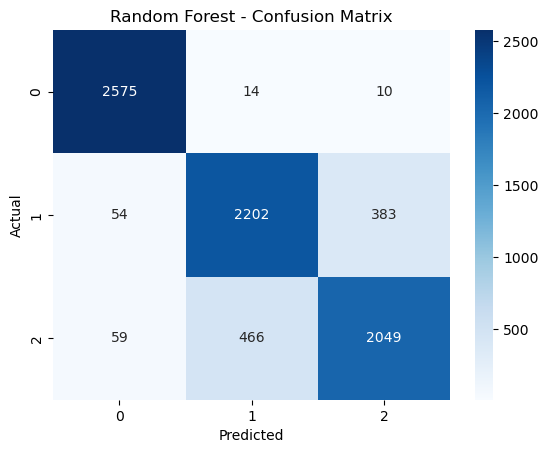

SVM Results
Accuracy: 0.7179979518689196


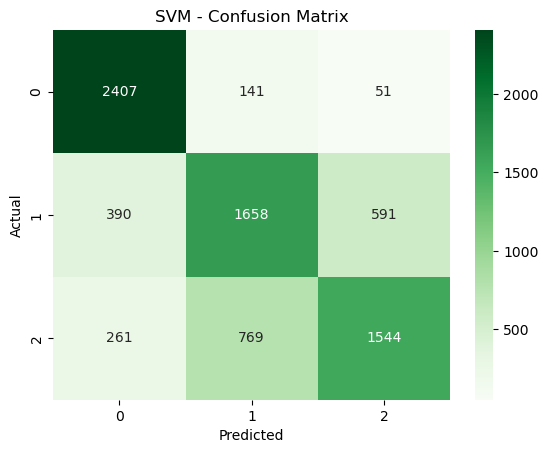

Naive Bayes Results
Accuracy: 0.44265232974910396


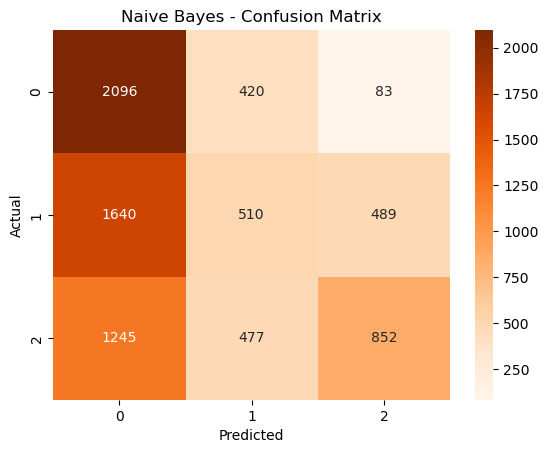

In [55]:
evaluate_model(rf, X_test, y_test, "Random Forest", cmap="Blues")
evaluate_model(svm, X_test_scaled, y_test, "SVM", cmap="Greens")
evaluate_model(nb, X_test_scaled, y_test, "Naive Bayes", cmap="Oranges")